## Delhi House Pirce Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('MagicBricks.xlsx')

In [3]:
df.isnull().sum()


Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [4]:
df["Bathroom"] = df["Bathroom"].interpolate()
df["Parking"] = df["Parking"].interpolate()

In [5]:
df["Furnishing"] = df["Furnishing"].fillna(df["Furnishing"].mode()[0])
df["Type"] = df["Type"].fillna(df["Type"].mode()[0])

In [6]:
df["Per_Sqft"] = df.groupby("Locality")["Per_Sqft"].transform(lambda x: x.fillna(x.median()))


C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sharm\AppData\Roaming\Python\Python312\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\sharm\AppData\Roaming\Pyth

In [7]:
df.isnull().sum()

Area            0
BHK             0
Bathroom        0
Furnishing      0
Locality        0
Parking         0
Price           0
Status          0
Transaction     0
Type            0
Per_Sqft       93
dtype: int64

In [8]:
df["Per_Sqft"] = df["Per_Sqft"].fillna(df["Per_Sqft"].median())


In [9]:
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

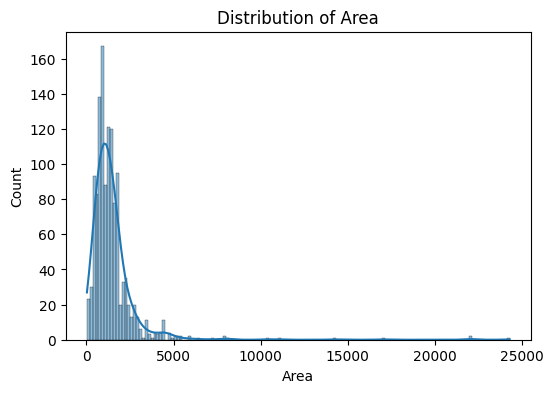

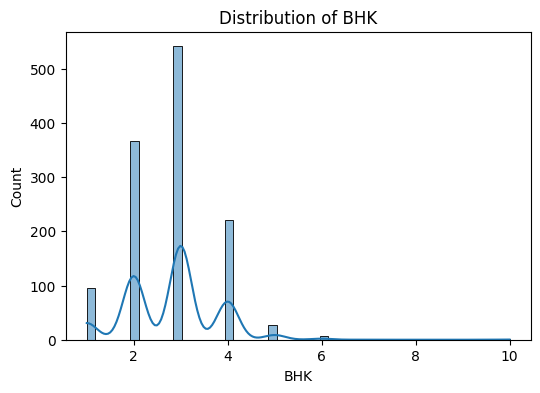

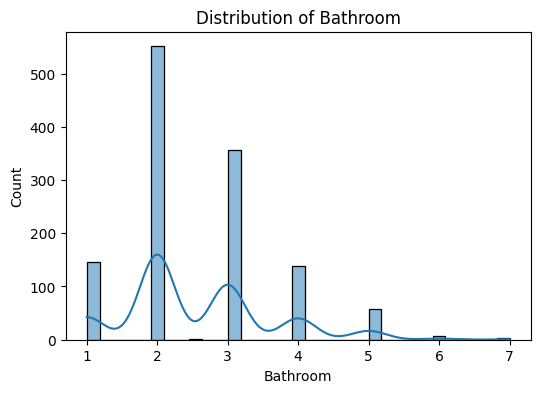

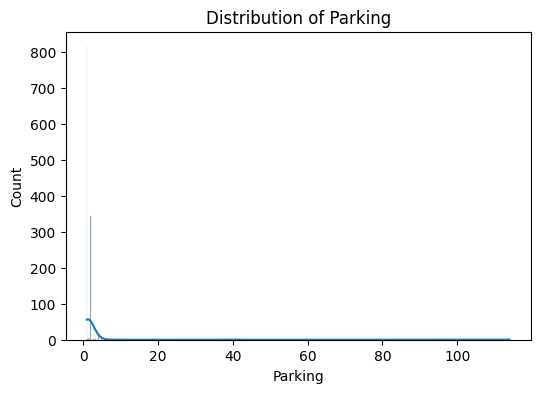

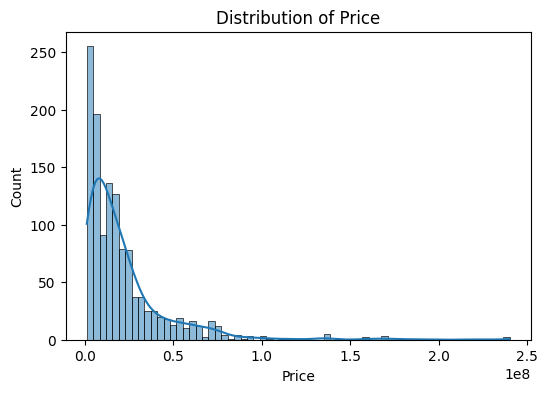

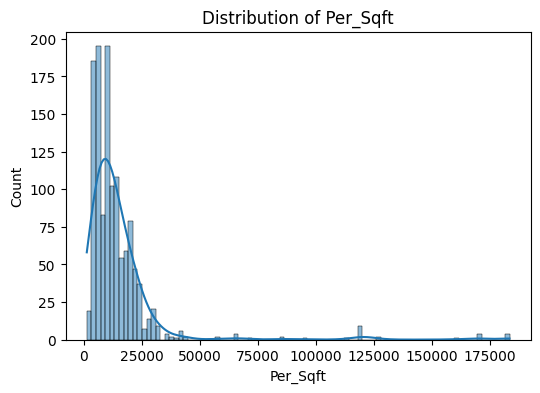

In [10]:
numeric_cols = ["Area", "BHK", "Bathroom", "Parking", "Price", "Per_Sqft"]

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

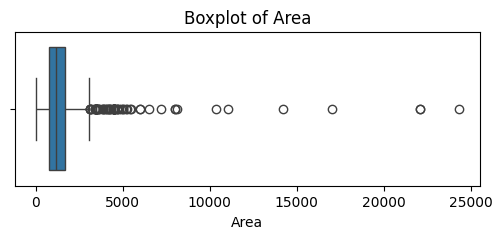

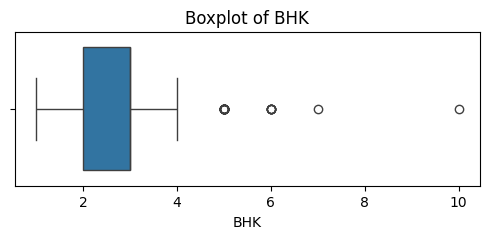

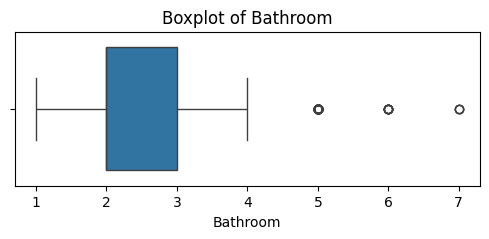

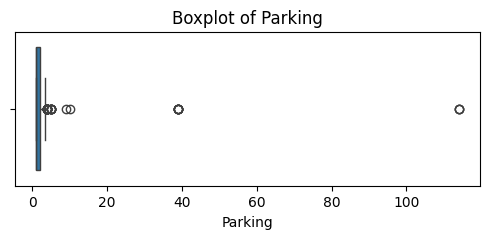

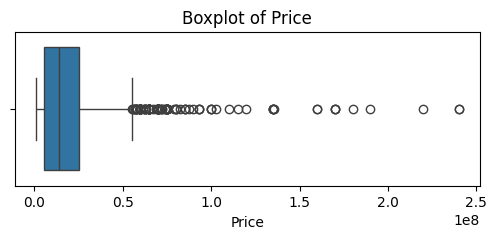

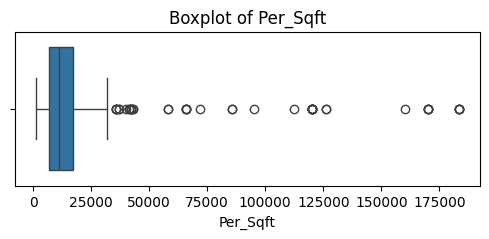

In [11]:
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


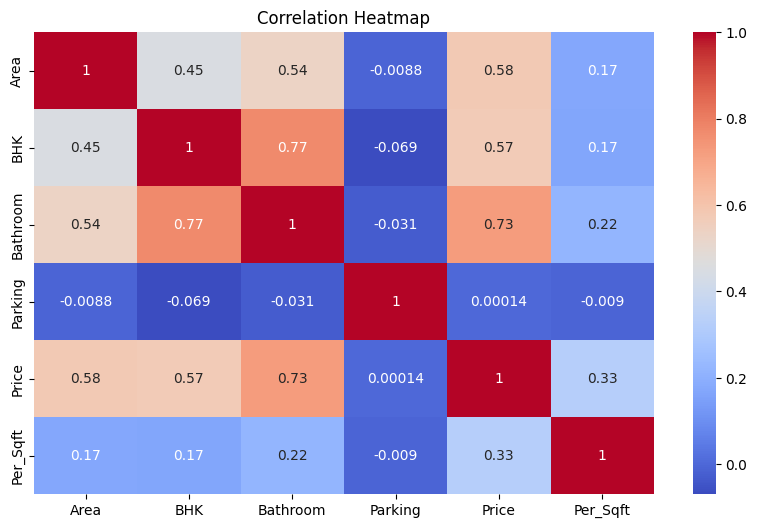

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
df_model = df[["Area", "BHK", "Bathroom", "Type", "Price"]].dropna()


In [16]:
X = df_model.drop("Price", axis=1)
y = df_model["Price"]


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first", handle_unknown='ignore'), ["Type"])
    ],
    remainder="passthrough"
)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model.fit(X_train, y_train)


c:\Program Files\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Type'])])),
                ('linearregression', LinearRegression())])

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))


R2 Score: 0.5607254518468402
RMSE: 18226275.571480867


In [23]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
# Random Forest
model_rf = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100, random_state=42))

# XGBoost
model_xgb = make_pipeline(preprocessor, XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

# Gradient Boosting
model_gb = make_pipeline(preprocessor, GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))


In [26]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("RF R2:", r2_score(y_test, y_pred_rf))
print("RF RMSE:", root_mean_squared_error(y_test, y_pred_rf))


RF R2: 0.7479579058824304
RF RMSE: 13805954.94022227


In [27]:
import joblib

# Save the trained Random Forest model pipeline
joblib.dump(model_rf, "price_predictor_rf.pkl")


['price_predictor_rf.pkl']